# cfDNA simulations w/ real WGBS 

assess the performance of our EM algorithm in challenging real data regimes

## Imports

In [1]:
import numpy as np 
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

## Load results 

In [19]:
def load_pickles(directory, ref_labels, ind_labels, mix_function):
    pickle_files = glob.glob(directory + "/*alpha_est.pkl")
    pickle_list = []
    for file in pickle_files:
        f = open(file, "rb")
        pickle_list.append(pkl.load(f))
        f.close()
        
    return pickle_to_df(pickle_list, ref_labels, ind_labels, mix_function)


In [28]:
def pickle_to_df(pickle_list, ref_labels, ind_labels, mix_function):
    df = pd.DataFrame(columns={"estimate", "individual", "tissue"})

    for pickle in pickle_list:

        for i, individual in enumerate(pickle):
            for j, estimate in enumerate(individual):
                truth = mix_function[i, j]
                df = df.append({"estimate":estimate, "individual":i, "truth":truth, "tissue":ref_labels[j]}, ignore_index=True)

    return df

In [71]:
def calculate_gamma_corr(directory, reference, training_labels):
    """
    calculate the correlation between the true and estimated EM output from the pickle files 
    """
    
    est_files = glob.glob(directory + "/*" + "gamma_est.pkl")
    df = pd.DataFrame(columns={"tissue", "correlation"})

    for file in range(len(est_files)):
        # load the files
        est_file = est_files[file]
        est = pkl.load(open(est_file, "rb"))

        for t in range(est.shape[0]): 
            corr = np.corrcoef(est[t, :], reference)[0][1]  # calculate the correlation 
            df = df.append({"tissue":training_labels[t], "correlation":corr}, ignore_index=True)
    
    return df

In [34]:
reference = pd.read_csv("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/test-training-tims-chip-rest.txt", header=None, sep="\t")

In [51]:
reference_meth = reference.iloc[:, 25::2].values.T
reference_depths = reference.iloc[:, 26::2].values.T
reference_percents = reference_meth/reference_depths

## two unknown 

### labels

In [31]:
test = ["tibial", "thyroid", "stomach", "spleen", "heart", "adipose", "upper lobe lung", 
        "adrenal", "small intestine","pancreas", "esophagus"]

training = ["small intestine", "adrenal", "stomach", "thyroid", "tibial", "adipose", 
            "pancreas", "spleen", "esophagus", "upper lobe lung", "heart"]

### mix functions

In [23]:
complex1 = pkl.load(open("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/complex_same_1.pkl", "rb"))
complex10 = pkl.load(open("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/complex_same_10.pkl", "rb"))
complex100 = pkl.load(open("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/complex_same_100.pkl", "rb"))

In [75]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same1/"
complex_same1 = load_pickles(directory, training, test, complex1)
complex_same1_gamma = calculate_gamma_corr(directory, reference_percents, training)

In [76]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same10/"
complex_same10 = load_pickles(directory, training, test, complex10)
complex_same10_gamma = calculate_gamma_corr(directory, reference_percents, training)

In [79]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same100/"
complex_same100 = load_pickles(directory, training, test, complex100)
complex_same100_gamma = calculate_gamma_corr(directory, reference_percents, training)

### plot

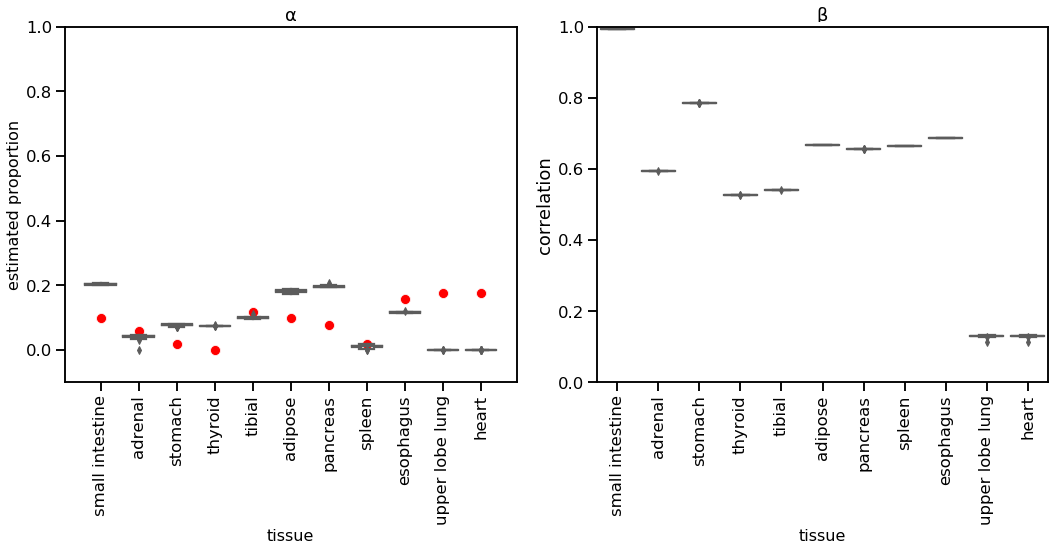

In [99]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = complex_same1, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = complex_same1, color="red", s=100, ax=ax1)
sns.boxplot("tissue", "correlation", data=complex_same1_gamma, color="#61c2d3", ax=ax2)

ax1.set_xlabel("tissue", fontsize=16)
ax2.set_xlabel("tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax1.set_ylim(-0.1, 1)
ax2.set_ylim(0, 1)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()


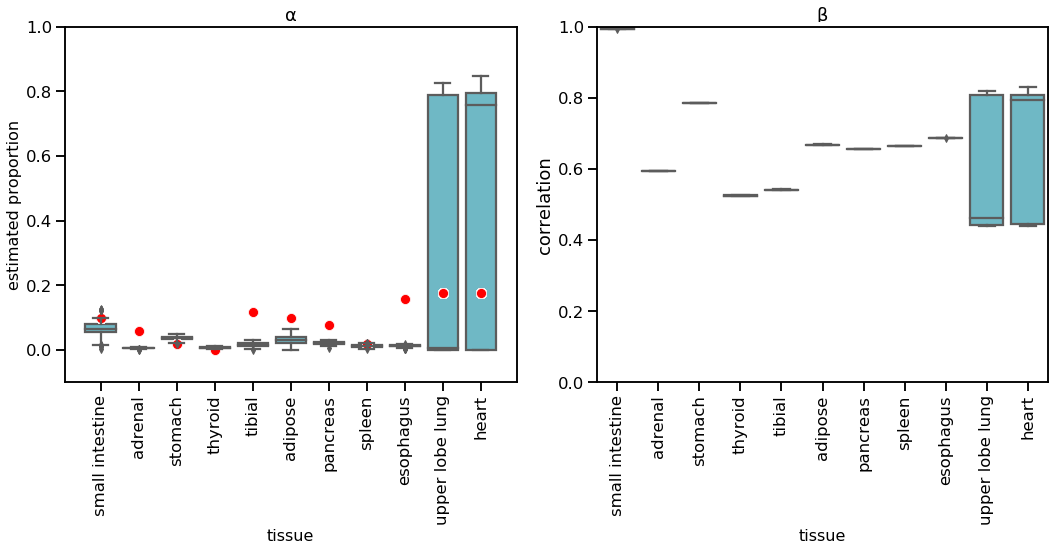

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = complex_same10, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = complex_same10, color="red", s=100, ax=ax1)
sns.boxplot("tissue", "correlation", data=complex_same10_gamma, color="#61c2d3", ax=ax2)

ax1.set_xlabel("tissue", fontsize=16)
ax2.set_xlabel("tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax1.set_ylim(-0.1, 1)
ax2.set_ylim(0, 1)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()


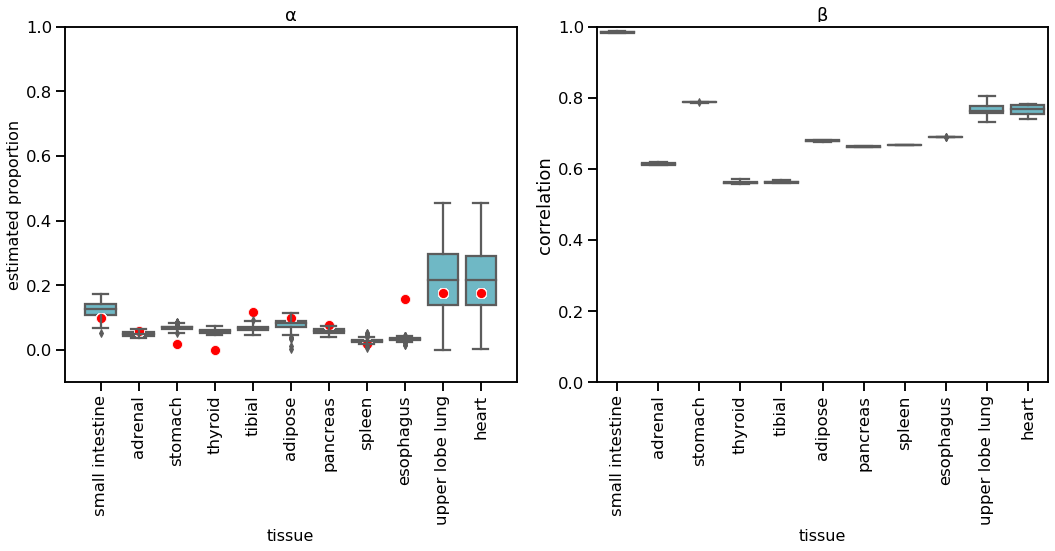

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,8))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = complex_same100, color="#61c2d3", ax=ax1)
sns.scatterplot("tissue", "truth", data = complex_same100, color="red", s=100, ax=ax1)
sns.boxplot("tissue", "correlation", data=complex_same100_gamma, color="#61c2d3", ax=ax2)

ax1.set_xlabel("tissue", fontsize=16)
ax2.set_xlabel("tissue", fontsize=16)
ax1.set_ylabel("estimated proportion", fontsize=16)
ax1.set_title("α")
ax2.set_title("β")

ax1.set_ylim(-0.1, 1)
ax2.set_ylim(0, 1)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()


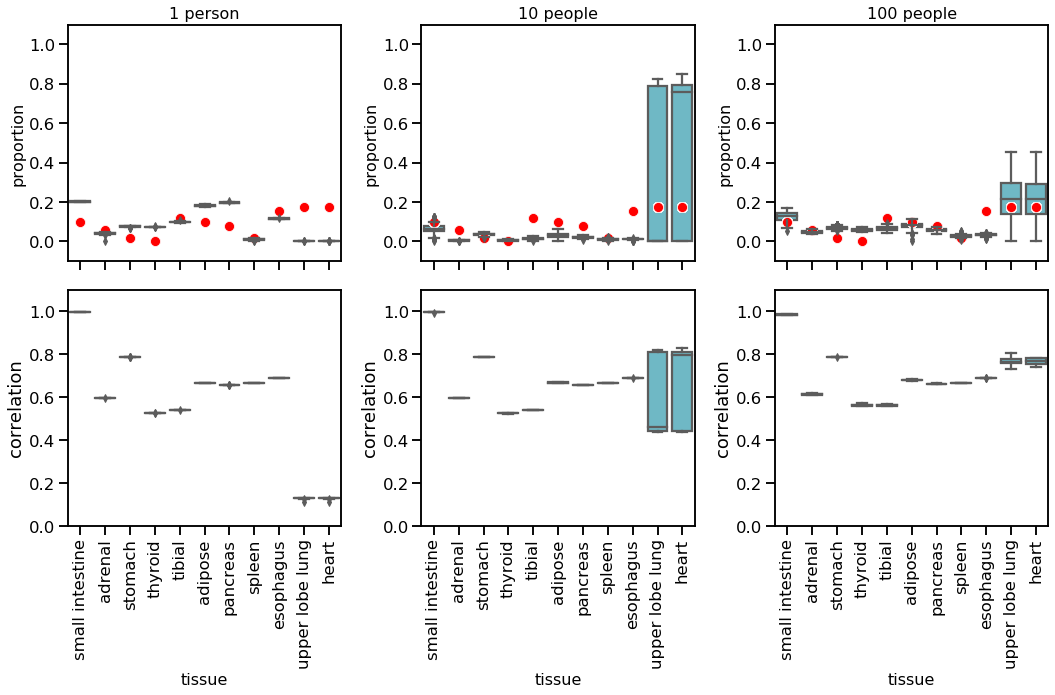

In [103]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True, figsize=(15,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = complex_same1, color="#61c2d3", ax=ax[0,0])
sns.scatterplot("tissue", "truth", data = complex_same1, color="red", s=100, ax=ax[0,0])
sns.boxplot("tissue", "correlation", data=complex_same1_gamma, color="#61c2d3", ax=ax[1,0])

sns.boxplot("tissue", "estimate", data = complex_same10, color="#61c2d3", ax=ax[0,1])
sns.scatterplot("tissue", "truth", data = complex_same10, color="red", s=100, ax=ax[0,1])
sns.boxplot("tissue", "correlation", data=complex_same10_gamma, color="#61c2d3", ax=ax[1,1])

sns.boxplot("tissue", "estimate", data = complex_same100, color="#61c2d3", ax=ax[0,2])
sns.scatterplot("tissue", "truth", data = complex_same100, color="red", s=100, ax=ax[0,2])
sns.boxplot("tissue", "correlation", data=complex_same100_gamma, color="#61c2d3", ax=ax[1,2])

ax[1, 0].set_xlabel("tissue", fontsize=16)
ax[1, 1].set_xlabel("tissue", fontsize=16)
ax[1, 2].set_xlabel("tissue", fontsize=16)

ax[0, 0].set_ylabel("proportion", fontsize=16)
ax[0, 1].set_ylabel("proportion", fontsize=16)
ax[0, 2].set_ylabel("proportion", fontsize=16)

ax[1, 0].set_ylim(0, 1.1)
ax[1, 1].set_ylim(0, 1.1)
ax[1, 2].set_ylim(0, 1.1)

ax[0, 0].set_ylim(-0.1, 1.1)
ax[0, 1].set_ylim(-0.1, 1.1)
ax[0, 2].set_ylim(-0.1, 1.1)

ax[0, 0].set_title("1 person", fontsize=16)
ax[0, 1].set_title("10 people", fontsize=16)
ax[0, 2].set_title("100 people", fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()


## no missing

### 1 person 

In [104]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same1_nomissing/"
complex_same1_nomissing = load_pickles(directory, training, test, complex1)
complex_same1_gamma_nomissing  = calculate_gamma_corr(directory, reference_percents, training)

### 10 people

In [105]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same10_nomissing/"
complex_same10_nomissing = load_pickles(directory, training, test, complex10)
complex_same10_gamma_nomissing  = calculate_gamma_corr(directory, reference_percents, training)

### 100 people 

In [106]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-complex_same100_nomissing/"
complex_same100_nomissing = load_pickles(directory, training, test, complex100)
complex_same100_gamma_nomissing  = calculate_gamma_corr(directory, reference_percents, training)

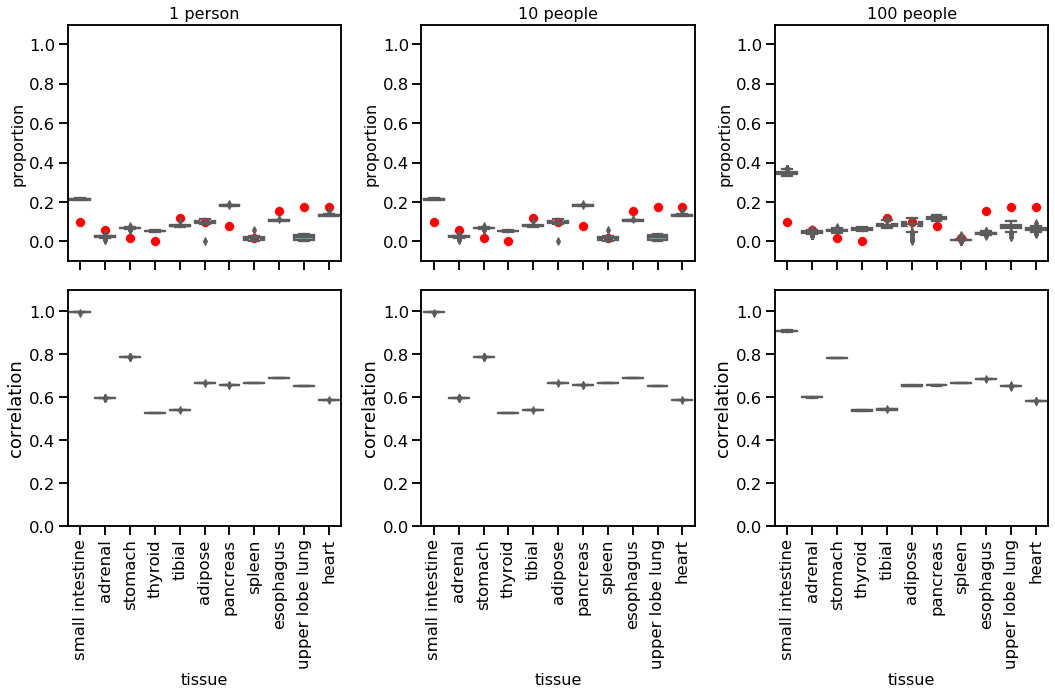

In [107]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharex=True, figsize=(15,10))

sns.set_context("talk")

sns.boxplot("tissue", "estimate", data = complex_same1_nomissing, color="#61c2d3", ax=ax[0,0])
sns.scatterplot("tissue", "truth", data = complex_same1_nomissing, color="red", s=100, ax=ax[0,0])
sns.boxplot("tissue", "correlation", data=complex_same1_gamma_nomissing, color="#61c2d3", ax=ax[1,0])

sns.boxplot("tissue", "estimate", data = complex_same10_nomissing, color="#61c2d3", ax=ax[0,1])
sns.scatterplot("tissue", "truth", data = complex_same10_nomissing, color="red", s=100, ax=ax[0,1])
sns.boxplot("tissue", "correlation", data=complex_same10_gamma_nomissing, color="#61c2d3", ax=ax[1,1])

sns.boxplot("tissue", "estimate", data = complex_same100_nomissing, color="#61c2d3", ax=ax[0,2])
sns.scatterplot("tissue", "truth", data = complex_same100_nomissing, color="red", s=100, ax=ax[0,2])
sns.boxplot("tissue", "correlation", data=complex_same100_gamma_nomissing, color="#61c2d3", ax=ax[1,2])

ax[1, 0].set_xlabel("tissue", fontsize=16)
ax[1, 1].set_xlabel("tissue", fontsize=16)
ax[1, 2].set_xlabel("tissue", fontsize=16)

ax[0, 0].set_ylabel("proportion", fontsize=16)
ax[0, 1].set_ylabel("proportion", fontsize=16)
ax[0, 2].set_ylabel("proportion", fontsize=16)

ax[1, 0].set_ylim(0, 1.1)
ax[1, 1].set_ylim(0, 1.1)
ax[1, 2].set_ylim(0, 1.1)

ax[0, 0].set_ylim(-0.1, 1.1)
ax[0, 1].set_ylim(-0.1, 1.1)
ax[0, 2].set_ylim(-0.1, 1.1)

ax[0, 0].set_title("1 person", fontsize=16)
ax[0, 1].set_title("10 people", fontsize=16)
ax[0, 2].set_title("100 people", fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.tight_layout()


In [110]:
increasing = pkl.load(open("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/increasing_2unk_encode.pkl", "rb"))

In [111]:
directory = "/Users/christacaggiano/Desktop/zaitlen_lab_desktop/chip-tims-set-2unk/"
set_2unk = load_pickles(directory, training, test, increasing)
set_2unk_gamma  = calculate_gamma_corr(directory, reference_percents, training)

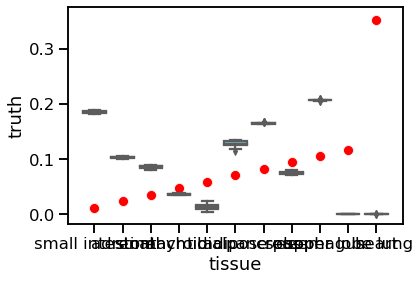

In [115]:
sns.boxplot("tissue", "estimate", data = set_2unk, color="#61c2d3")
sns.scatterplot("tissue", "truth", data = set_2unk, color="red", s=100)
# sns.boxplot("tissue", "correlation", data=complex_same1_gamma_nomissing, color="#61c2d3", ax=ax[1,0])


In [118]:
increasing = increasing.repeat(100, axis=0)

In [120]:
pkl.dump(increasing, open("/Users/christacaggiano/Desktop/zaitlen_lab_desktop/increasing_2unk_encode_100.pkl", "wb"))